In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import os

import tensorflow as tf

# Data

## Data EDA

In [2]:
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train[['Last_name','First_name']] = data_train['Name'].str.split(', ', n=1, expand=True)

data_train['Last_name'] = data_train['Last_name'].str.strip()
data_train['First_name'] = data_train['First_name'].str.strip()

In [6]:
data_train.drop('Name', axis=1, inplace=True)

In [7]:
data_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
data_train_encoded = pd.get_dummies(data_train, columns=['Sex','Embarked'], dtype=int)

In [9]:
data_train_numerical = data_train_encoded.drop(['Ticket','Cabin','Last_name','First_name'], axis=1)

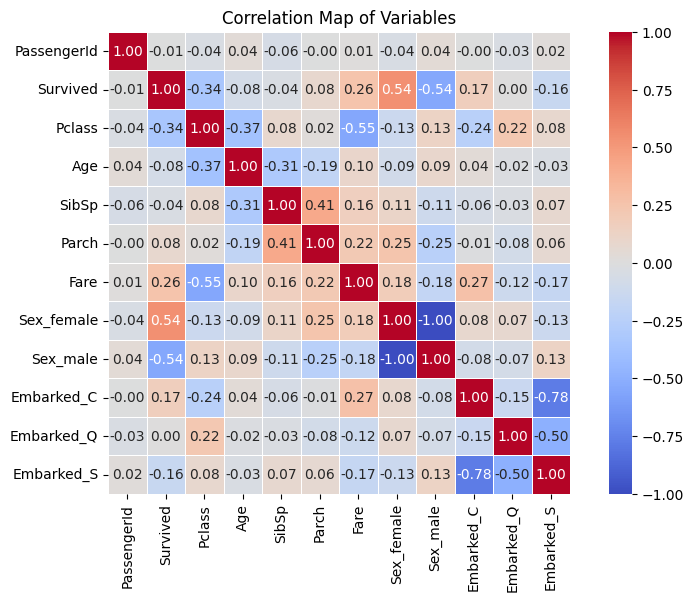

In [10]:
corr_matrix = data_train_numerical.corr()

plt.figure(figsize=(10,6))

sns.heatmap(
    corr_matrix,
    vmin=-1,      # Minimum correlation value
    vmax=1,      # Maximum correlation value
    center=0,    # Center the color bar at 0
    cmap='coolwarm', # Colormap (e.g., 'coolwarm', 'viridis', 'YlGnBu')
    square=True, # Ensure square cells
    annot=True,  # Add correlation values (annotations) to the cells
    fmt='.2f',   # Format the annotations to 2 decimal places
    linewidths=.5 # Add spacing between cells
)

plt.title('Correlation Map of Variables')
plt.show()

## Feature Engineering with column 'Age'

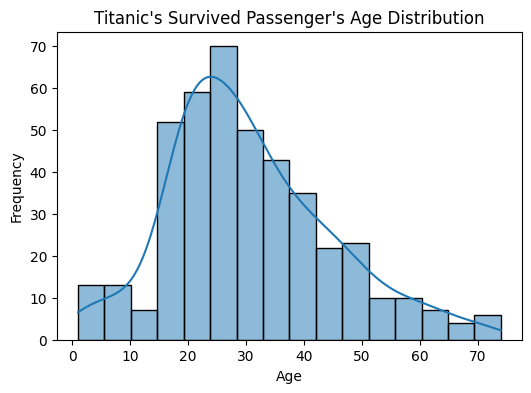

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data_train['Age'][data_train['Survived']==0], kde=True)

plt.title("Titanic's Survived Passenger's Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

In [12]:
data_train_numerical_new = data_train_numerical.copy()
data_train_numerical_new['Age'] = pd.qcut(data_train_numerical['Age'], q=20)

In [13]:
data_train_numerical_new['Age'].unique()

[(20.125, 22.0], (36.0, 38.0], (25.0, 27.0], (34.0, 36.0], NaN, ..., (41.0, 45.0], (45.0, 50.0], (28.0, 30.0], (24.0, 25.0], (22.0, 24.0]]
Length: 21
Categories (20, interval[float64, right]): [(0.419, 4.0] < (4.0, 14.0] < (14.0, 17.0] < (17.0, 19.0] ... (41.0, 45.0] < (45.0, 50.0] < (50.0, 56.0] < (56.0, 80.0]]

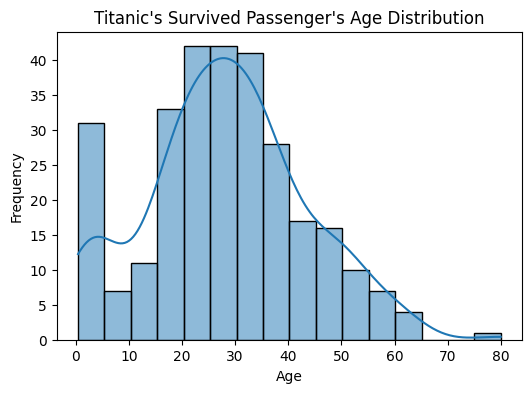

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data_train_encoded['Age'][data_train_encoded['Survived']==1], kde=True)

plt.title("Titanic's Survived Passenger's Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

In [15]:
# Adding TITLE column
data_train_encoded['Title'] = data_train_encoded['First_name'].str.extract('([A-Za-z]+)\.', expand=False)

data_train_encoded['Title'] = data_train_encoded['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ROG\AppData\Local\Temp\ipykernel_19876\1444742915.py:2: SyntaxWarning: invalid escape sequence '\.'
  data_train_encoded['Title'] = data_train_encoded['First_name'].str.extract('([A-Za-z]+)\.', expand=False)


###  Missing Values

In [16]:
data_train_encoded['Age'] = data_train_encoded.groupby(['Pclass', 'Sex_male', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

data_train_encoded['Age'] = data_train_encoded.groupby(['Sex_male', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

data_train_encoded['Age'] = data_train_encoded.groupby(['Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [17]:
data_train_encoded['Title'] = data_train_encoded['Title'].replace(['Lady','Countess','Capt','Col','Don',
                                                   'Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

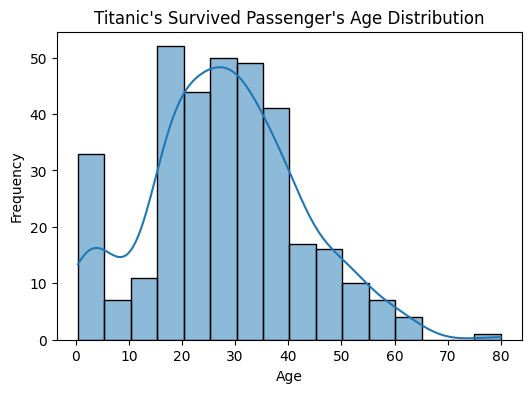

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(data_train_encoded['Age'][data_train_encoded['Survived']==1], kde=True)

plt.title("Titanic's Survived Passenger's Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

## Feature Engineering with column 'Ticket'

In [19]:
prefix = data_train_encoded['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'None')
prefix = prefix.str.replace(r'[./]', '', regex=True).str.upper()
    
# Show how many unique prefixes there are there and their counts
prefix_counts = prefix.value_counts()
print(prefix_counts)
print(f"\nTotal unique prefixes in training set:", len(prefix_counts))

Ticket
NONE       665
PC          60
CA          41
A5          21
SOTONOQ     15
STONO       12
SCPARIS     11
WC          10
A4           7
SOC          6
STONO2       6
C            5
FCC          5
SOPP         3
SCAH         3
PP           3
WEP          3
PPP          2
SOTONO2      2
SWPP         2
SCA4         1
SP           1
SCOW         1
SOP          1
FA           1
AS           1
SC           1
FC           1
CASOTON      1
Name: count, dtype: int64

Total unique prefixes in training set: 29


In [20]:
ticket_counts = data_train_encoded['Ticket'].value_counts()
    
# 1. Total number of duplicate tickets (tickets shared by 2+ people)
duplicates = ticket_counts[ticket_counts >= 2]
print(f"Tickets that appear 2 or more times       : {len(duplicates)}")
print(f"Passengers traveling with someone (same ticket): {duplicates.sum()}")
print(f"Passengers with completely unique ticket : {len(data_train_encoded) - duplicates.sum()}")

Tickets that appear 2 or more times       : 134
Passengers traveling with someone (same ticket): 344
Passengers with completely unique ticket : 547


In [21]:
print(f"\nTop 15 most common tickets:")
print(duplicates.head(20).to_string())


Top 15 most common tickets:
Ticket
347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
113760          4
19950           4
349909          4
347077          4
4133            4
2666            4
113781          4
17421           4
W./C. 6608      4
LINE            4
PC 17757        4
363291          3


In [22]:
data_train_encoded[data_train_encoded['Ticket']=='A/5 21171']
# Many of these duplicate tickets indicate that their Pclass are in lower class(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Last_name,First_name,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,22.0,1,0,A/5 21171,7.25,NaN,Braund,Mr. Owen Harris,0,1,0,0,1,Mr


In [23]:
data_train_encoded['Ticket_prefix'] = data_train_encoded['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'None')
# Clean some obvious cases
data_train_encoded['Ticket_prefix'] = data_train_encoded['Ticket_prefix'].str.replace('.', '').str.replace('/', '').str.upper()
data_train_encoded['Ticket_prefix'] = data_train_encoded['Ticket_prefix'].replace(['A5','A4','AQ3','AQ4','AS','C','CA','CASOTON','FC','FCC',
                                                       'FA','LP','PP','PPP','SC','SCA3','SCA4','SCAH','SCOW',
                                                       'SOP','SOPP','SOTONO','SP','STONO','SWPP','WEP','WC'], 'Rare')
data_train_encoded['Ticket_prefix'] = data_train_encoded['Ticket_prefix'].replace(['A','SOTONOQ','STONO2','SOTONO2','STONOQ','WEP','WC','SCPARIS','SOC','SOP','PPP'], 'Rare')
    
# 2. Ticket numeric part length — this is surprisingly powerful
data_train_encoded['Ticket_len'] = data_train_encoded['Ticket'].apply(lambda x: len(x.replace(' ','').replace('.','').replace('/','')) )
    
# 3. Purely numeric ticket? (many cheap tickets are just numbers)
data_train_encoded['Ticket_numeric'] = data_train_encoded['Ticket'].apply(lambda x: 1 if x.replace(' ','').isdigit() else 0)

data_train_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Last_name,First_name,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title,Ticket_prefix,Ticket_len,Ticket_numeric
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,Braund,Mr. Owen Harris,0,1,0,0,1,Mr,Rare,7,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,Cumings,Mrs. John Bradley (Florence Briggs Thayer),1,0,1,0,0,Mrs,PC,7,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Heikkinen,Miss. Laina,1,0,0,0,1,Miss,Rare,13,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,Futrelle,Mrs. Jacques Heath (Lily May Peel),1,0,0,0,1,Mrs,NONE,6,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,Allen,Mr. William Henry,0,1,0,0,1,Mr,NONE,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,Montvila,Rev. Juozas,0,1,0,0,1,Rare,NONE,6,1
887,888,1,1,19.0,0,0,112053,30.0000,B42,Graham,Miss. Margaret Edith,1,0,0,0,1,Miss,NONE,6,1
888,889,0,3,18.0,1,2,W./C. 6607,23.4500,NaN,Johnston,"Miss. Catherine Helen ""Carrie""",1,0,0,0,1,Miss,Rare,6,0
889,890,1,1,26.0,0,0,111369,30.0000,C148,Behr,Mr. Karl Howell,0,1,1,0,0,Mr,NONE,6,1


In [24]:
data_train_encoded['Ticket_prefix'].value_counts()

Ticket_prefix
NONE    665
Rare    166
PC       60
Name: count, dtype: int64

## Feature Engineering with column 'Cabin'

In [25]:
data_train_encoded['HasCabin'] = data_train_encoded['Cabin'].notna().astype(int)
data_train_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Last_name,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title,Ticket_prefix,Ticket_len,Ticket_numeric,HasCabin
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,Braund,...,0,1,0,0,1,Mr,Rare,7,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,Cumings,...,1,0,1,0,0,Mrs,PC,7,0,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Heikkinen,...,1,0,0,0,1,Miss,Rare,13,0,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,Futrelle,...,1,0,0,0,1,Mrs,NONE,6,1,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,Allen,...,0,1,0,0,1,Mr,NONE,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,Montvila,...,0,1,0,0,1,Rare,NONE,6,1,0
887,888,1,1,19.0,0,0,112053,30.0000,B42,Graham,...,1,0,0,0,1,Miss,NONE,6,1,1
888,889,0,3,18.0,1,2,W./C. 6607,23.4500,NaN,Johnston,...,1,0,0,0,1,Miss,Rare,6,0,0
889,890,1,1,26.0,0,0,111369,30.0000,C148,Behr,...,0,1,1,0,0,Mr,NONE,6,1,1


## Finishing

C:\Users\ROG\AppData\Local\Temp\ipykernel_19876\741631.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv = temp.groupby('q')['Survived'].mean()


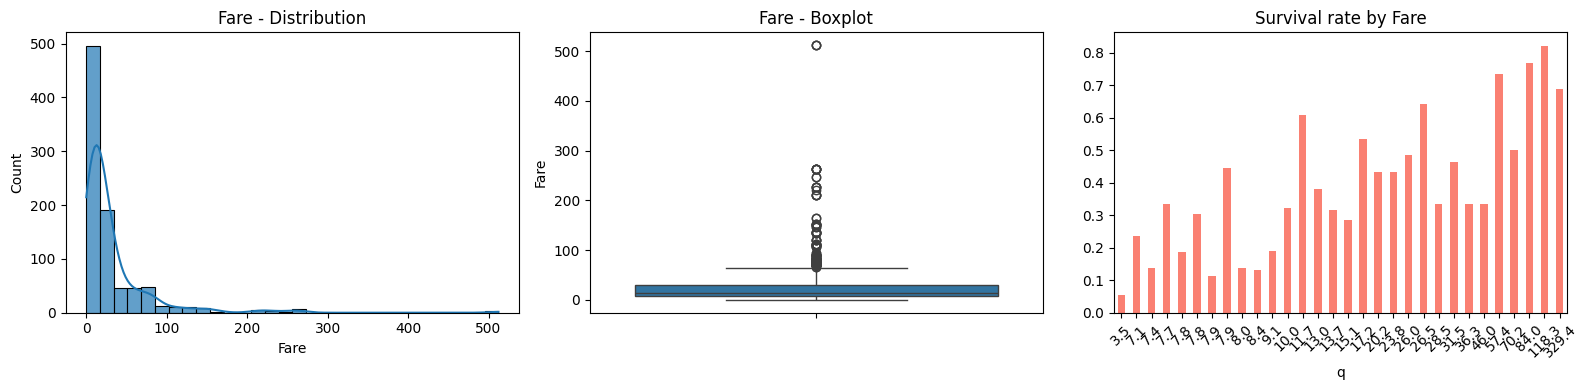

In [26]:
def plot_spread(col, bins=30):
    fig, axes = plt.subplots(1, 3, figsize=(16,4))
    
    # Histogram + KDE
    sns.histplot(data=data_train_encoded, x=col, kde=True, bins=bins, ax=axes[0], alpha=0.7)
    axes[0].set_title(f'{col} - Distribution')
    
    # Boxplot
    sns.boxplot(y=data_train_encoded[col], ax=axes[1])
    axes[1].set_title(f'{col} - Boxplot')
    
    # Survival rate by quantile (if Survived exists)
    if 'Survived' in data_train_encoded.columns:
        temp = data_train_encoded.copy()
        temp['q'] = pd.qcut(temp[col], q=30, duplicates='drop')
        surv = temp.groupby('q')['Survived'].mean()
        surv.plot(kind='bar', ax=axes[2], color='salmon')
        axes[2].set_title(f'Survival rate by {col}')
        axes[2].set_xticklabels([f'{i:.1f}' for i in surv.index.categories.mid], rotation=45)
    
    plt.tight_layout()
    plt.show()

# Try it
plot_spread('Fare')

In [27]:
data_train_final = data_train_encoded.drop(['Cabin','Ticket','Sex_female','First_name','Last_name'], axis=1, errors='ignore')

In [28]:
data_train_final = pd.get_dummies(data_train_final, columns=['Title','Ticket_prefix'], dtype=int)

In [29]:
data_train_final[data_train_final['Fare']>500]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,...,Ticket_numeric,HasCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Ticket_prefix_NONE,Ticket_prefix_PC,Ticket_prefix_Rare
258,259,1,1,35.0,0,0,512.3292,0,1,0,...,0,0,0,1,0,0,0,0,1,0
679,680,1,1,36.0,0,1,512.3292,1,1,0,...,0,1,0,0,1,0,0,0,1,0
737,738,1,1,35.0,0,0,512.3292,1,1,0,...,0,1,0,0,1,0,0,0,1,0


# Model

## ...

In [30]:
# X = data_train_final.drop('Survived', axis=1).copy()
# y = data_train_final['Survived'].copy()

In [31]:
# logreg = LogisticRegression(
#     penalty='l2',        
#     C=0.9,                 
#     solver='liblinear',    
#     max_iter=1000,
#     random_state=42
# )

In [32]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# logreg.fit(X_train, y_train)
# val_pred = logreg.predict(X_val)
# val_proba = logreg.predict_proba(X_val)[:,1]

# print("Logistic Regression Results")
# print(f"Accuracy : {accuracy_score(y_val, val_pred):.5f}")
# print(f"ROC AUC  : {roc_auc_score(y_val, val_proba):.5f}")

In [34]:
# print("Confusion Matrix:")
# cm = confusion_matrix(y_val, val_pred)

# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels='01', yticklabels='01')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# Prediction

In [35]:
# data_train_final["Fare"] = data_train_final["Fare"].fillna(data_train_final["Fare"].median())

In [36]:
# data_train_final.info()

In [37]:
# predictions = logreg.predict(data_train_final)

In [38]:
# submission = pd.DataFrame({
#     "PassengerId": data_train_final["PassengerId"],
#     "Survived": predictions
# })

In [39]:
# submission.to_csv("submission.csv", index=False)
# print("submission.csv saved! 🎉")
# print(submission["Survived"].value_counts())